In [46]:
import numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
from random import random

Helper functions

In [4]:
def meters2grid(pose_m, nrows=1000, ncols=1000):
    # [0, 0](m) -> [250, 250]
    # [1, 0](m) -> [250+100, 250]
    # [0,-1](m) -> [250, 250-100]
    pose_on_grid = np.array(pose_m)*100 + np.array([ncols/2, nrows/2])
    return np.array( pose_on_grid, dtype=int)

def grid2meters(pose_grid, nrows=1000, ncols=1000):
    # [250, 250] -> [0, 0](m)
    # [250+100, 250] -> [1, 0](m)
    # [250, 250-100] -> [0,-1](m)
    pose_meters = ( np.array(pose_grid) - np.array([ncols/2, nrows/2]) ) / 100.0
    return pose_meters

def normalize(vector):
    if np.linalg.norm(vector)==0: return np.zeros_like(vector)
    return vector / np.linalg.norm(vector)

def draw_map(obstacles_poses, R_obstacles, nrows=1000, ncols=1000):
    plt.grid()
    plt.xlabel('X')
    plt.ylabel('Y')
    ax = plt.gca()
    for pose in obstacles_poses:
        circle = plt.Circle(pose, R_obstacles, color='black')
        ax.add_artist(circle)

def draw_robot(robot):
    plt.plot(robot.pose[0], robot.pose[1], 'ro', color='blue')

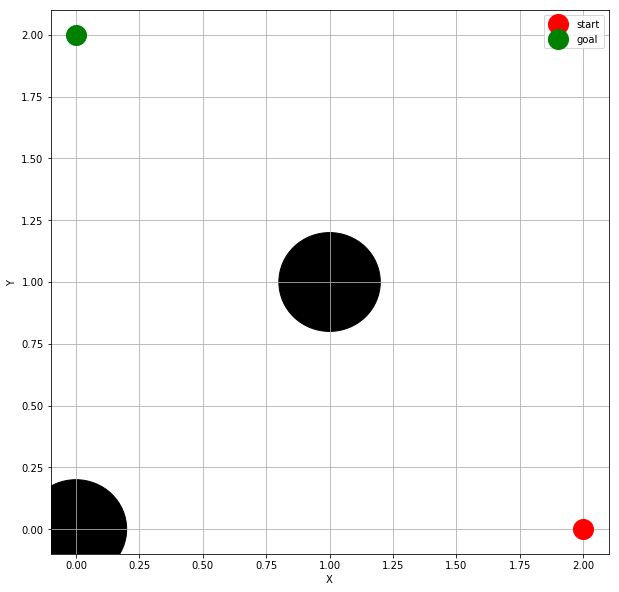

In [17]:
obstacles_poses = [[0,0], [1,1]]
R_obstacles = 0.2
start = [2, 0]
goal = [0, 2]


plt.figure(figsize=(10,10))
draw_map(obstacles_poses, R_obstacles)
plt.plot(start[0],start[1], 'ro', color='red', markersize=20, label='start')
plt.plot(goal[0],goal[1], 'ro', color='green', markersize=20, label='goal')
plt.legend()

In [26]:
# Initialize RRT. The RRT will be represented as a 2 x N list of points. So
# each column represents a vertex of the tree.
rrt_verts = np.zeros([2,1000])
rrt_verts[:,0] = start
N = 1
nearGoal = False # This will be set to true if goal has been reached
minDistGoal = 0.25 # This is the convergence criterion. We will declare
#                     success when the tree reaches within 0.25 in distance
#                     from the goal. DO NOT MODIFY.

In [27]:
# Extension parameter
d = 0.5 # This controls how far the RRT extends in each step. DO NOT MODIFY

In [58]:
# RRT algorithm
# while not nearGoal
for i in range(100):
    # Sample point
    rnd = random()
    # With probability 0.05, sample the goal. This promotes movement to the goal.
    if rnd < 0.05:
        xy = goal
    else:
        # Sample (uniformly) from space (with probability 0.95). The space is defined
        # with the bounds world_bounds_x and world_bounds_y defined above.
        # So, the x coordinate should be sampled in the interval
        # world_bounds_x=2.5 and the y coordinate from world_bounds_y=2.5.
        xy = [random()*5-2.5, random()*5-2.5]; # Should be a 2 x 1 vector
#     plt.plot(xy[0],xy[1], 'ro')